# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

## Import Statements

<img src="assets/bricks.jpg">

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [ ]:
135

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [ ]:
28

**Challenge**: Change this into an h3 section heading: Understanding LEGO Themes vs. LEGO Sets

# **Understanding LEGO Themes vs. LEGO Sets**

### Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

<img src="assets\lego_themes.png" alt="Lego Themes">


**Challenge**: Display this image: https://i.imgur.com/aKcwkSx.png

### A lego **set** is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src="assets\lego_sets.png" alt="Batman Theme">

**Challenge**: Display this image https://i.imgur.com/whB1olq.png

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [3]:
sets = pd.read_csv('data/sets.csv')
sets.head()

NameError: name 'pd' is not defined

**Challenge**: In which year were the first LEGO sets released and what were these sets called?

**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

      num_parts
year           
1949  99.600000
1950   1.000000
1953  13.500000
1954  12.357143
1955  36.607143
       num_parts
year            
2017  221.840967
2018  213.618873
2019  207.510714
2020  259.732938
2021    0.000000


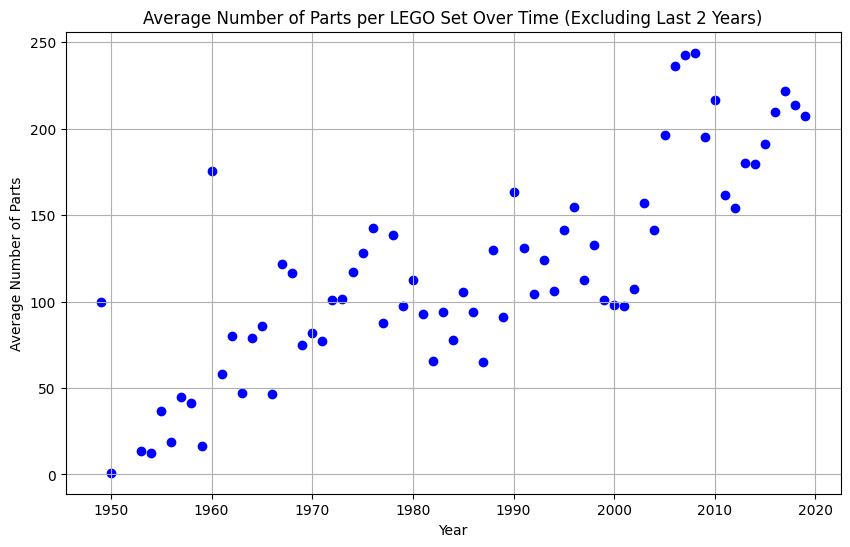

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
file_path = r'C:\Users\Siris\Desktop\GitHub Projects 100 Days NewB\_24_0078__Day74_Aggregate_and_Merge_Data_w_Pandas__240814\NewProject\r00-r09 START\r00_env_START\data\sets.csv'
df = pd.read_csv(file_path)

# Calculate the average number of parts per LEGO set for each year
parts_per_set = df.groupby('year').agg({'num_parts': pd.Series.mean})

# Display the first few rows to verify the result
print(parts_per_set.head())
print(parts_per_set.tail())

# Exclude the last two years from the data
parts_per_set_trimmed = parts_per_set[:-2]

# Create a scatter plot to visualize the trend
plt.figure(figsize=(10, 6))
plt.scatter(parts_per_set_trimmed.index, parts_per_set_trimmed['num_parts'], color='b', marker='o')
plt.title('Average Number of Parts per LEGO Set Over Time (Excluding Last 2 Years)')
plt.xlabel('Year')
plt.ylabel('Average Number of Parts')
plt.grid(True)
plt.show()






**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

### Line Charts with Two Seperate Axes

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

**Challenge** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png

<img src="assets/rebrickable_schema.png">

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

### Merging (i.e., Combining) DataFrames based on a Key


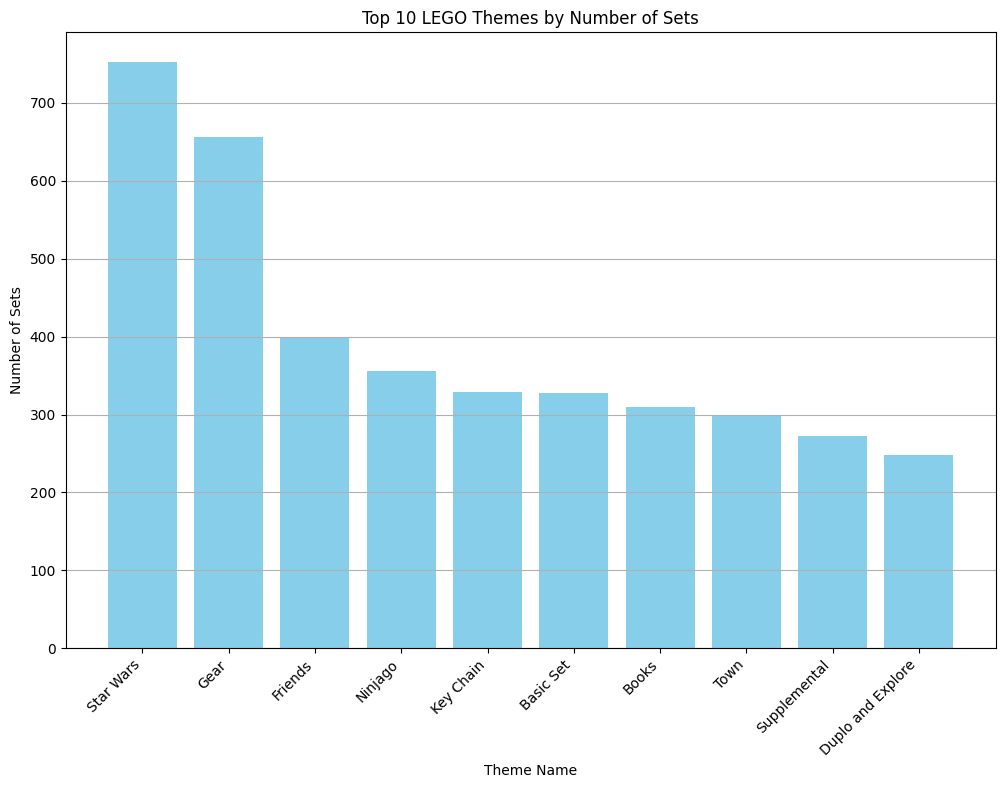

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the sets.csv and themes.csv files into DataFrames
sets_file_path = r'C:\Users\Siris\Desktop\GitHub Projects 100 Days NewB\_24_0078__Day74_Aggregate_and_Merge_Data_w_Pandas__240814\NewProject\r00-r09 START\r00_env_START\data\sets.csv'
themes_file_path = r'C:\Users\Siris\Desktop\GitHub Projects 100 Days NewB\_24_0078__Day74_Aggregate_and_Merge_Data_w_Pandas__240814\NewProject\r00-r09 START\r00_env_START\data\themes.csv'

sets_df = pd.read_csv(sets_file_path)
themes_df = pd.read_csv(themes_file_path)

# Get the count of sets per theme_id
set_theme_count = sets_df["theme_id"].value_counts()

# Merge the set_theme_count with the themes_df to get theme names
merged_df = pd.DataFrame({'theme_id': set_theme_count.index, 'set_count': set_theme_count.values})
merged_df = merged_df.merge(themes_df[['id', 'name']], left_on='theme_id', right_on='id')

# Select the top 10 themes
top_10_themes = merged_df.head(10)

# Plot the data as a bar graph
plt.figure(figsize=(12, 8))
plt.bar(top_10_themes['name'], top_10_themes['set_count'], color='skyblue')
plt.title('Top 10 LEGO Themes by Number of Sets')
plt.xlabel('Theme Name')
plt.ylabel('Number of Sets')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

